In [32]:
import pandas as pd
from sklearn import * 
import numpy as np
from mlxtend.plotting import plot_confusion_matrix


%matplotlib inline

In [33]:
df = pd.read_csv("/data/credit-default.csv")

In [34]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

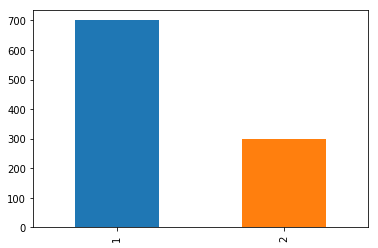

In [36]:
df.default.value_counts().plot.bar()

In [37]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [38]:
#Baseline for accuracy = 0.7

Accurcy: 0.753333,
precision: 0.641304,
recall: 0.590000


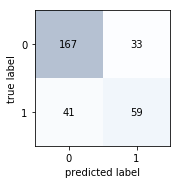

In [40]:
target = "default"
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = np.where(df[target] == 2, 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0
                    , max_iter=2000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

"""
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))
""";

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)
        ))

In [42]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[167,  33],
       [ 41,  59]])

In [22]:
pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

,actual,predicted
0,1,1
1,1,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [41]:
df2 = pd.read_csv("/data/creditcard-fraud.csv")
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Accurcy: 0.999052,
precision: 0.855856,
recall: 0.593750


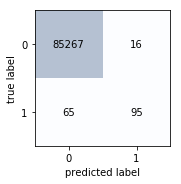

In [46]:
target = "Class"
X = df.loc[:, "V1":"V28"]
X = pd.get_dummies(X, drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0
                    , max_iter=2000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (metrics.accuracy_score(y_test, y_test_pred),
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)
        ))

In [50]:
y_test_prob = est.predict_proba(X_test)
y_test_prob

array([[9.99623422e-01, 3.76578155e-04],
       [9.99892959e-01, 1.07041199e-04],
       [9.99207805e-01, 7.92194619e-04],
       ...,
       [9.99652957e-01, 3.47042558e-04],
       [9.99933955e-01, 6.60446101e-05],
       [9.99466158e-01, 5.33842305e-04]])

In [ ]:
# First column represents P(y=0)
# Second column represents p(y=1)

In [51]:
# P(y=1)
y_test_prob = est.predict_proba(X_test)[:,1]
y_test_prob

array([3.76578155e-04, 1.07041199e-04, 7.92194619e-04, ...,
       3.47042558e-04, 6.60446101e-05, 5.33842305e-04])

Accurcy: 0.999052,
precision: 0.855856,
recall: 0.593750


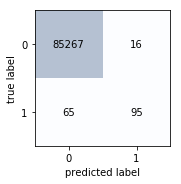

In [52]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
# 0.5 is the probability threshold to get class prediction from the prob
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (metrics.accuracy_score(y_test, y_test_pred),
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)
        ))

What should be the probability threshold for each of these scenerios?
1. you are building a spam classifier. 
2. You want to invest in a stock 10L. Whether to invest or not on a given stock?
3. Building an app to detect skin cancer 

Accurcy: 0.998853,
precision: 0.860465,
recall: 0.462500


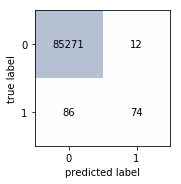

In [53]:
y_test_pred = np.where(y_test_prob > 0.9, 1, 0)
# 0.5 is the probability threshold to get class prediction from the prob
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (metrics.accuracy_score(y_test, y_test_pred),
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)
        ))

Accurcy: 0.999122,
precision: 0.774194,
recall: 0.750000


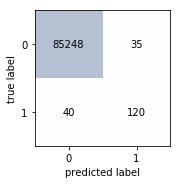

In [54]:
y_test_pred = np.where(y_test_prob > 0.1, 1, 0)
# 0.5 is the probability threshold to get class prediction from the prob
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (metrics.accuracy_score(y_test, y_test_pred),
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)
        ))

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [56]:
import matplotlib.pyplot as plt

Text(0,0.5,'TPR')

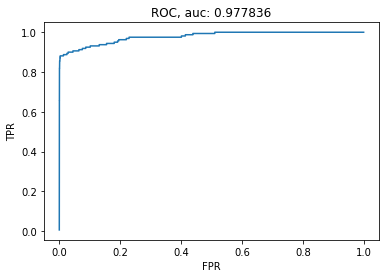

In [63]:
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc: %f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
# ideal value for tpr and fpr (1, 0)

We often use auc for model selection. 
We do not usually use accuracy, precision, recall etc. 
because they have underlying assumption of probability threshold. In deep learning, accuracy as model selection criteria is OK.



In [64]:
pd.DataFrame({"tpr": tpr, "fpr": fpr, "threshold": thresholds})

,fpr,threshold,tpr
0,0.000000,1.000000e+00,0.00625
1,0.000000,1.000000e+00,0.01250
2,0.000000,1.000000e+00,0.05000
3,0.000000,9.999976e-01,0.19375
4,0.000012,9.999742e-01,0.19375
5,0.000012,9.999458e-01,0.20000
6,0.000023,9.999091e-01,0.20000
7,0.000023,9.998423e-01,0.21875
8,0.000035,9.998171e-01,0.21875
9,0.000035,9.998126e-01,0.23125
